In [18]:
import pandas as pd
import os
import re
import numpy as np

import sys
current_dir = os.getcwd()
scripts_path = os.path.join(current_dir, '../../scripts')
sys.path.append(os.path.abspath(scripts_path))
import preprocess_function as process

In [19]:
# Create folder to save dataset
base_dir = '../../data/'
raw_dir = os.path.join(base_dir, 'raw')
curated_dir = os.path.join(base_dir, 'curated')
manual_dir = os.path.join(base_dir, 'manual')
landing_dir = os.path.join(base_dir, 'landing')

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

if not os.path.exists(curated_dir):
    os.makedirs(curated_dir)

In [20]:
# read data
df = pd.read_csv(f"{raw_dir}/individual_property_unpreprocessed.csv")

In [21]:
df.head(5)

,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,...,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2015,206051128,16053.0,11283.0,25900,9137.0
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2016,206051128,16490.0,"10,997",25900,9846.0
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2017,206051128,16500.0,"11,489",25900,10465.0
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2018,206051128,16728.0,"11,682",25900,9780.0
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2019,206051128,17081.0,"11,683",25900,9648.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82852 entries, 0 to 82851
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       82852 non-null  object 
 1   Cost                          11836 non-null  float64
 2   Property Type                 82852 non-null  object 
 3   Bedrooms                      82852 non-null  int64  
 4   Bathrooms                     82852 non-null  int64  
 5   Latitude                      82852 non-null  float64
 6   Longitude                     82852 non-null  float64
 7   Closest Gov Secondary School  71890 non-null  object 
 8   Gov Secondary Distance        71890 non-null  object 
 9   Age under 20                  81858 non-null  object 
 10  Age 20-39                     81858 non-null  object 
 11  Age 40-59                     81858 non-null  object 
 12  Age 60+                       81858 non-null  object 
 13  P

# Preprocessing

In [23]:
df.shape

(82852, 28)

# Remove unvalid records
- unvalid address
- zero value in number of bedrooms or bathrooms

In [24]:
# Use a regular expression to find rows where the address matches the condition
# The condition is: the last four characters are digits, and the rest of the address has no digits
df_clean = df[~df['Address'].str.match(r'^[^\d]*\d{4}$')]

print(df_clean)


                                           Address   Cost Property Type  \
0      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
1      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
2      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
3      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
4      8/90 Hambleton Street, Middle Park VIC 3206    NaN     Apartment   
...                                            ...    ...           ...   
82847      17 Freeman Crescent, Baranduda VIC 3691  750.0         House   
82848      17 Freeman Crescent, Baranduda VIC 3691  750.0         House   
82849      17 Freeman Crescent, Baranduda VIC 3691    NaN         House   
82850      17 Freeman Crescent, Baranduda VIC 3691    NaN         House   
82851      17 Freeman Crescent, Baranduda VIC 3691    NaN         House   

       Bedrooms  Bathrooms   Latitude   Longitude  \
0             1          1 -37.847553  144.960

In [25]:
# Remove rows where 'Bedrooms' or 'Bathrooms' columns have a value of 0
df_filtered = df_clean[(df_clean['Bedrooms'] != 0) & (df_clean['Bathrooms'] != 0)]

df_filtered.shape

(82474, 28)

# Simplified data
Clean the following features, only leave numerical values:

'Gov Secondary Distance', 'Age under 20', 'Age 20-39', 'Age 40-59', and 'Age 60+'

In [26]:
df_filtered.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                    NaN
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Gov Secondary Distance                                          1.2 km away
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode    

In [27]:
# Simplified 'Gov Secondary Distance'
# Skip NaN values
# Extract numeric values

# Function to extract the numeric part from 'Gov Secondary Distance', and handle NaN and invalid values
def extract_numeric_distance(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    match = re.search(r'(\d+\.?\d*)', value)  # Search for the numeric part
    if match:
        return float(match.group(1))  # Return the matched numeric part
    return None  # If no valid numeric value is found, return None

df_filtered['Gov Secondary Distance (numeric)'] = df_filtered['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))
df_filtered.iloc[1]


Address                             8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                        NaN
Property Type                                                         Apartment
Bedrooms                                                                      1
Bathrooms                                                                     1
Latitude                                                             -37.847553
Longitude                                                            144.960477
Closest Gov Secondary School                                Albert Park College
Gov Secondary Distance                                              1.2 km away
Age under 20                                                                36%
Age 20-39                                                                   15%
Age 40-59                                                                   30%
Age 60+                                 

In [28]:
# Rename numeric columnbs
df_filtered = df_filtered.drop('Gov Secondary Distance', axis=1)
df_filtered = df_filtered.rename(columns={'Gov Secondary Distance (numeric)': 'Gov Secondary Distance'})
df_filtered.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                    NaN
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode                                                               3206
CBD Distance

In [29]:
# Remove '%' symbol for columns 'Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+'

# List of columns with percentage values
percentage_columns = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']

# Loop through each column to remove '%' symbol
df_filtered[percentage_columns] = df_filtered[percentage_columns].apply(lambda x: x.str.replace('%', ''))

# Display the updated dataframe
df_filtered.head()


,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Age under 20,Age 20-39,...,Park Distance,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded,Gov Secondary Distance
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.1886,0.5198,1.6056,2015,206051128,16053.0,11283.0,25900,9137.0,1.2
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.1886,0.5198,1.6056,2016,206051128,16490.0,"10,997",25900,9846.0,1.2
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.1886,0.5198,1.6056,2017,206051128,16500.0,"11,489",25900,10465.0,1.2
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.1886,0.5198,1.6056,2018,206051128,16728.0,"11,682",25900,9780.0,1.2
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.1886,0.5198,1.6056,2019,206051128,17081.0,"11,683",25900,9648.0,1.2


# Missing value

In [30]:
# missing value
print("number of missing value in each column：")
print(df_filtered.isnull().sum())

number of missing value in each column：
Address                             0
Cost                            70692
Property Type                       0
Bedrooms                            0
Bathrooms                           0
Latitude                            0
Longitude                           0
Closest Gov Secondary School    10878
Age under 20                      994
Age 20-39                         994
Age 40-59                         994
Age 60+                           994
Postcode                            0
CBD Distance                        0
Train Distance                      0
Electricity Distance                0
Hospital Distance                   0
Library Distance                    0
Park Distance                       0
Tourist Attraction Distance         0
Grocery Distance                    0
Year                                0
SA2_CODE21                          0
Population                          0
Income                              0
LGA_CODE24

In [31]:
# Dropping rows with missing values in columns other than 'Cost', 'Closest Gov Secondary School', and 'Gov Secondary Distance'
df_cleaned = df_filtered.dropna(subset=[col for col in df_filtered.columns if col not in ['Cost', 'Closest Gov Secondary School', 'Gov Secondary Distance']])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81480 entries, 0 to 82767
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       81480 non-null  object 
 1   Cost                          11640 non-null  float64
 2   Property Type                 81480 non-null  object 
 3   Bedrooms                      81480 non-null  int64  
 4   Bathrooms                     81480 non-null  int64  
 5   Latitude                      81480 non-null  float64
 6   Longitude                     81480 non-null  float64
 7   Closest Gov Secondary School  70798 non-null  object 
 8   Age under 20                  81480 non-null  object 
 9   Age 20-39                     81480 non-null  object 
 10  Age 40-59                     81480 non-null  object 
 11  Age 60+                       81480 non-null  object 
 12  Postcode                      81480 non-null  int64  
 13  CBD Di

# Remove Outlier

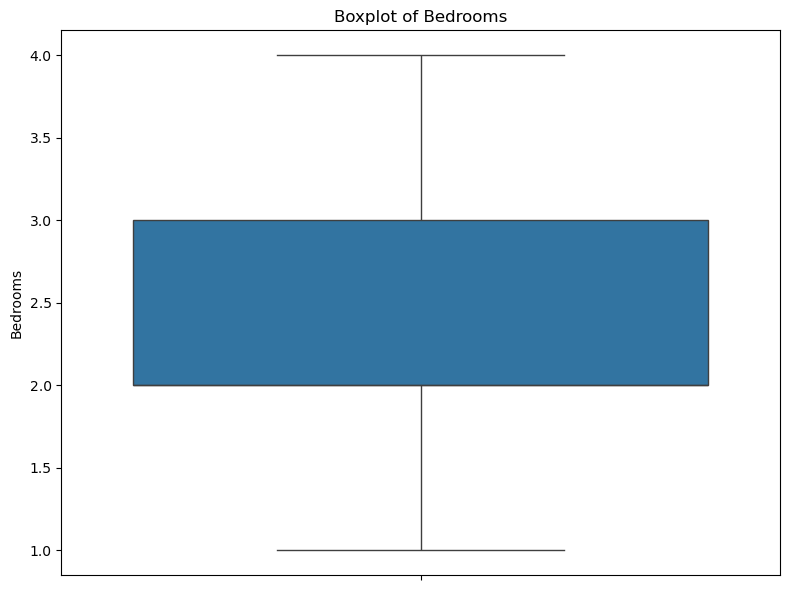

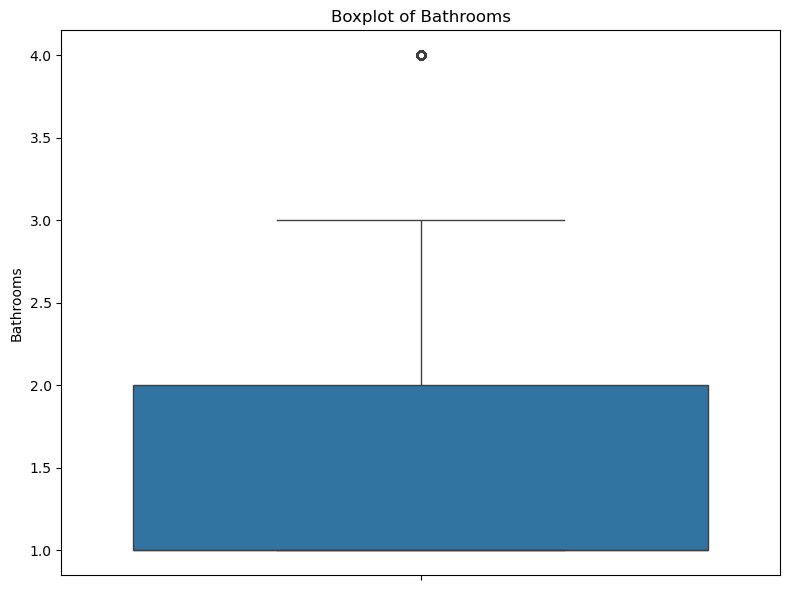

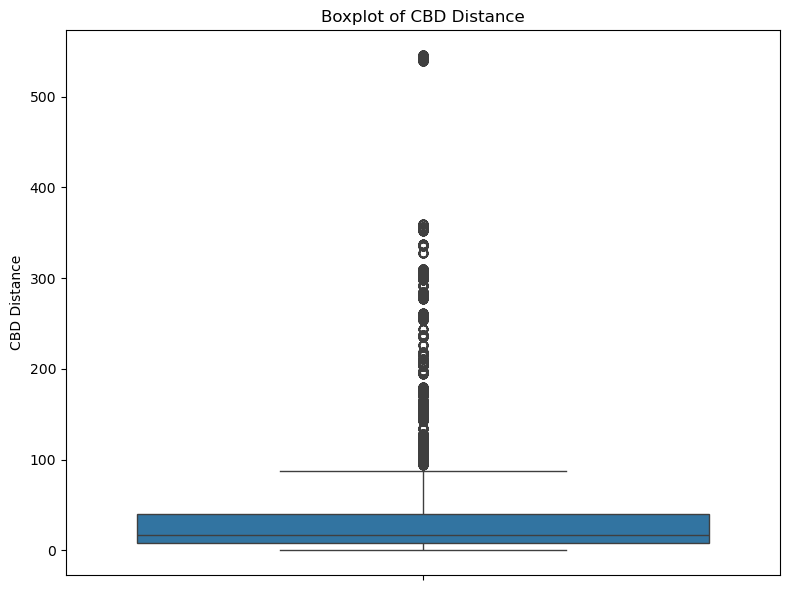

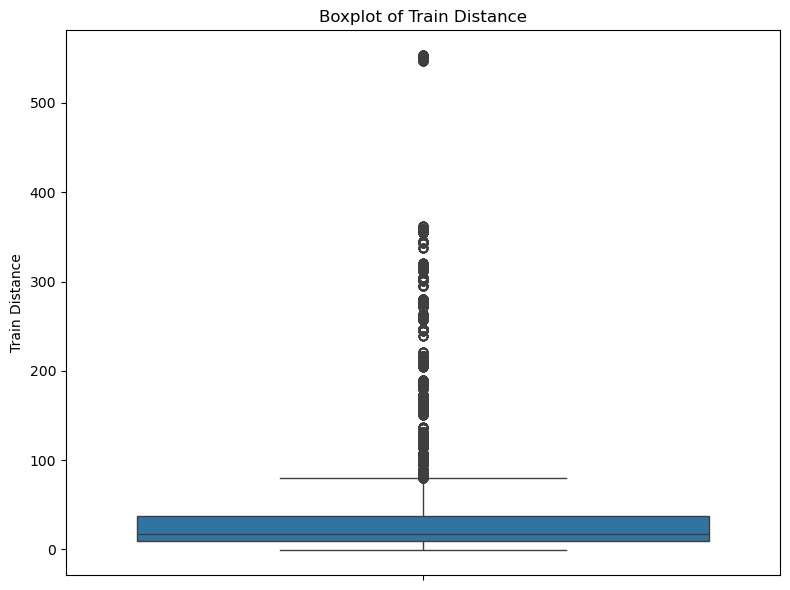

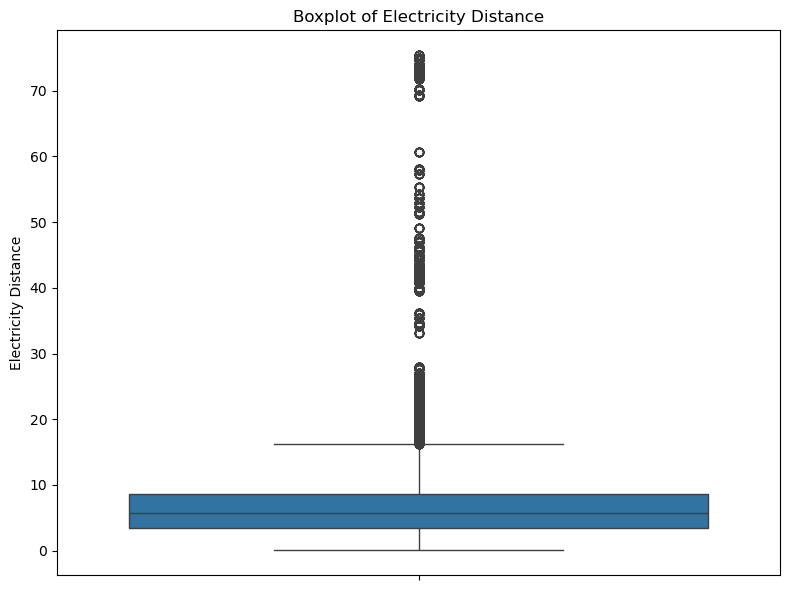

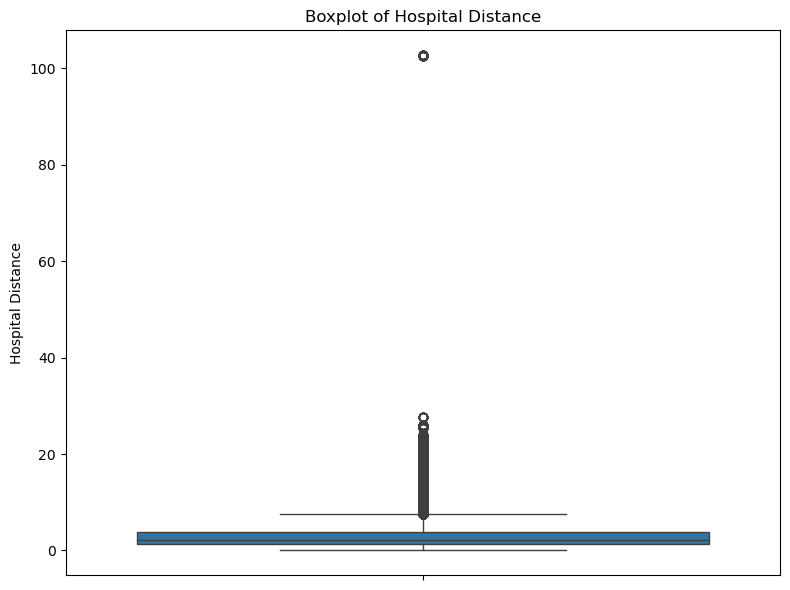

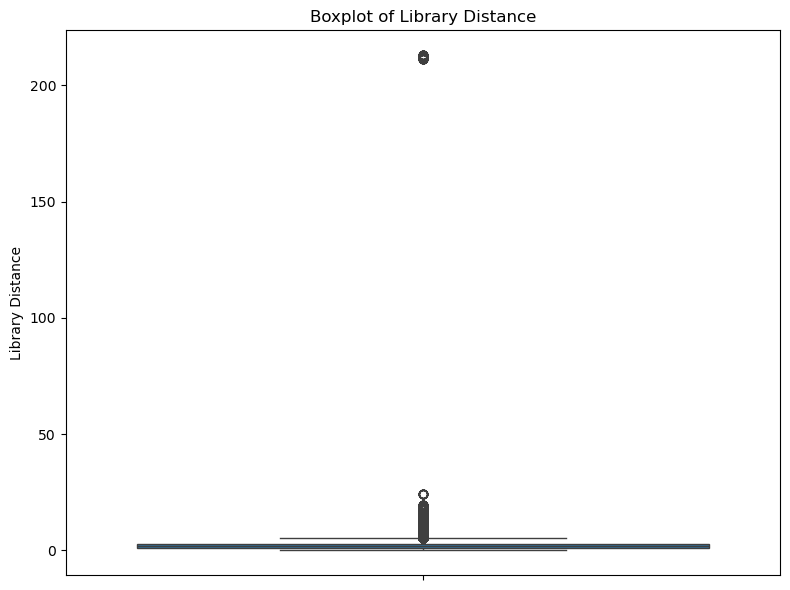

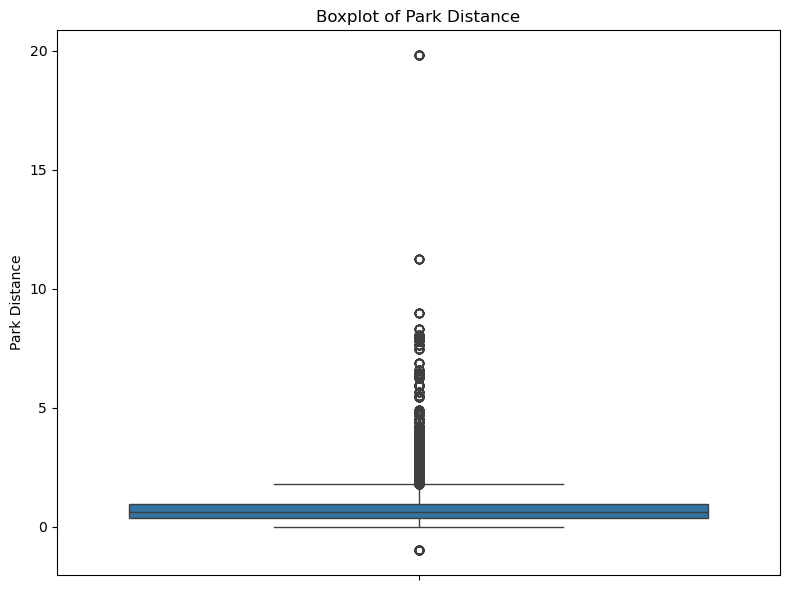

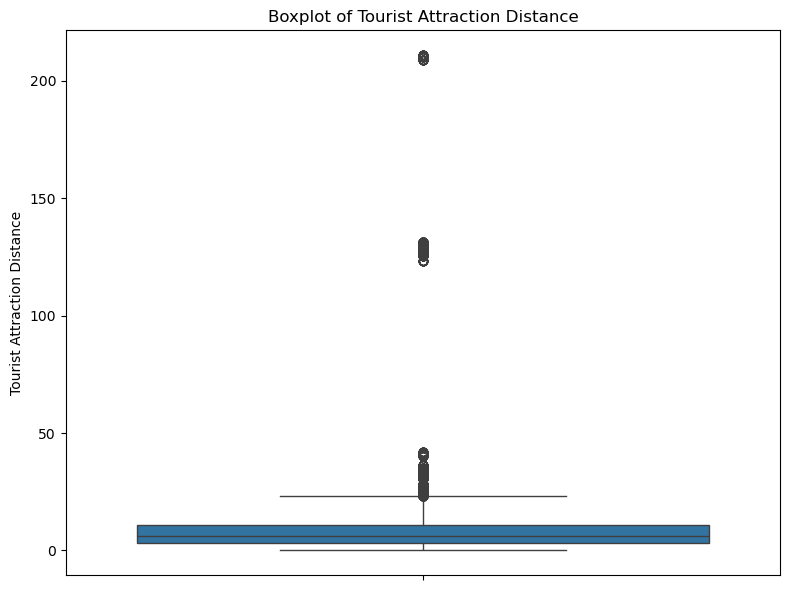

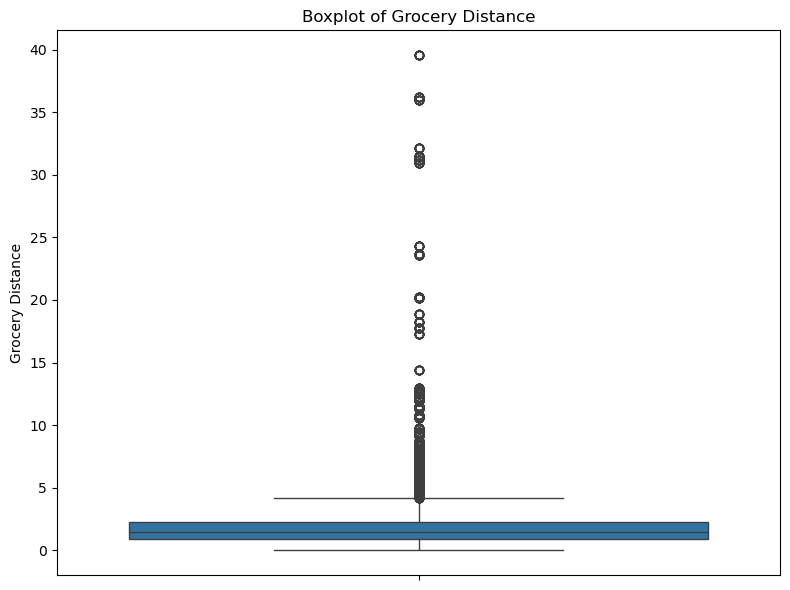

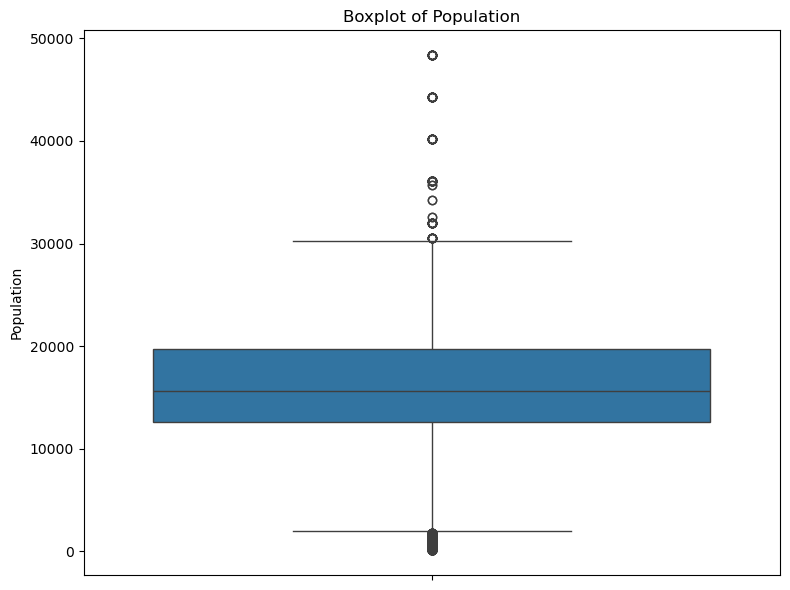

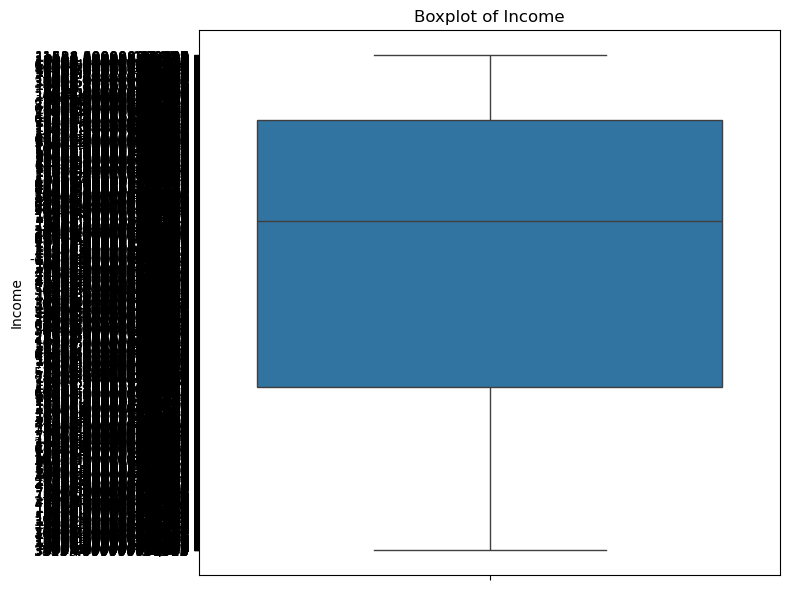

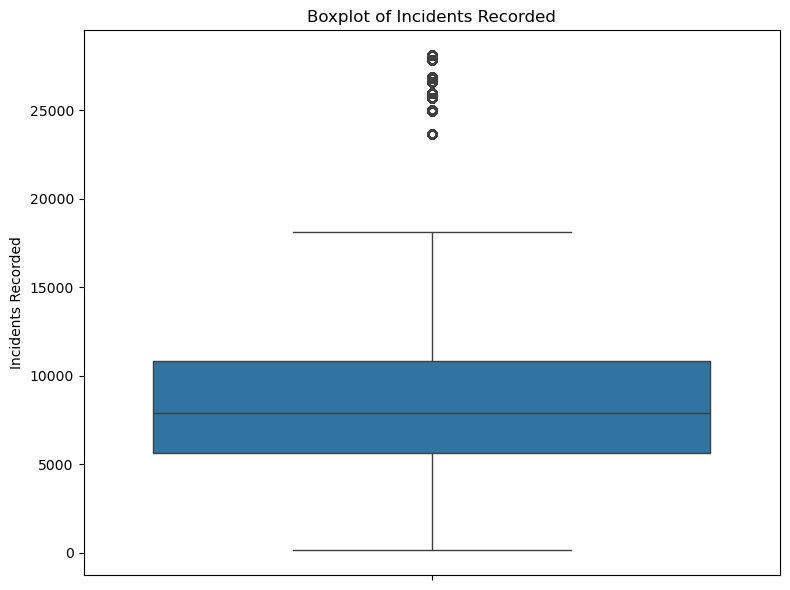

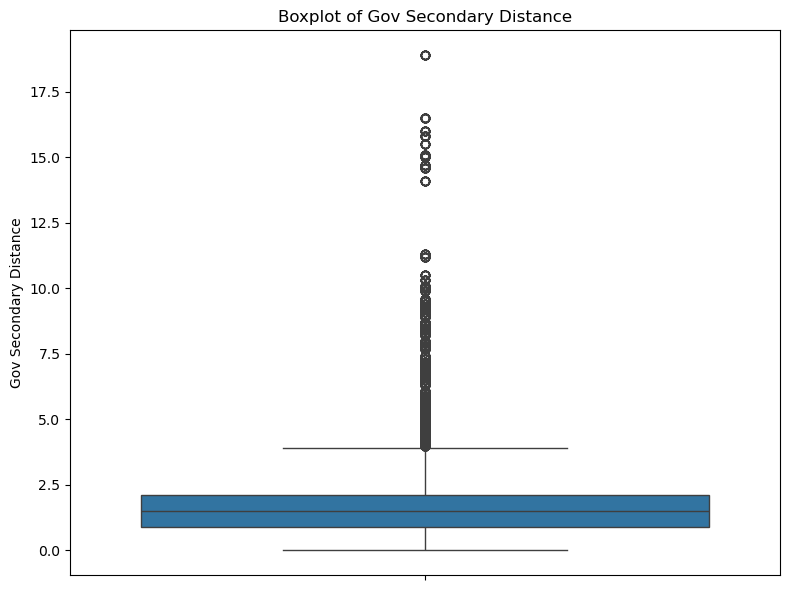

In [32]:
process.plot_boxplots(df_cleaned, 'Bedrooms')
process.plot_boxplots(df_cleaned, 'Bathrooms')
process.plot_boxplots(df_cleaned, 'CBD Distance')
process.plot_boxplots(df_cleaned, 'Train Distance')
process.plot_boxplots(df_cleaned, 'Electricity Distance')
process.plot_boxplots(df_cleaned, 'Hospital Distance')
process.plot_boxplots(df_cleaned, 'Library Distance')
process.plot_boxplots(df_cleaned, 'Park Distance')
process.plot_boxplots(df_cleaned, 'Tourist Attraction Distance')
process.plot_boxplots(df_cleaned, 'Grocery Distance')
process.plot_boxplots(df_cleaned, 'Population')
process.plot_boxplots(df_cleaned, 'Income')
process.plot_boxplots(df_cleaned, 'Incidents Recorded')
process.plot_boxplots(df_cleaned, 'Gov Secondary Distance')

# Convert DataType

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81480 entries, 0 to 82767
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       81480 non-null  object 
 1   Cost                          11640 non-null  float64
 2   Property Type                 81480 non-null  object 
 3   Bedrooms                      81480 non-null  int64  
 4   Bathrooms                     81480 non-null  int64  
 5   Latitude                      81480 non-null  float64
 6   Longitude                     81480 non-null  float64
 7   Closest Gov Secondary School  70798 non-null  object 
 8   Age under 20                  81480 non-null  object 
 9   Age 20-39                     81480 non-null  object 
 10  Age 40-59                     81480 non-null  object 
 11  Age 60+                       81480 non-null  object 
 12  Postcode                      81480 non-null  int64  
 13  CBD Di

In [34]:
# convert to string type
string_columns = ['Address', 'Property Type', 'Closest Gov Secondary School']
df_cleaned[string_columns] = df_cleaned[string_columns].astype(str)

/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_7377/1476191187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[string_columns] = df_cleaned[string_columns].astype(str)


In [35]:
# convert to float type, and remove ','
columns_to_convert = df_cleaned.columns.difference(string_columns)

df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].replace({',': ''}, regex=True).astype(float)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81480 entries, 0 to 82767
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       81480 non-null  object 
 1   Cost                          11640 non-null  float64
 2   Property Type                 81480 non-null  object 
 3   Bedrooms                      81480 non-null  float64
 4   Bathrooms                     81480 non-null  float64
 5   Latitude                      81480 non-null  float64
 6   Longitude                     81480 non-null  float64
 7   Closest Gov Secondary School  81480 non-null  object 
 8   Age under 20                  81480 non-null  float64
 9   Age 20-39                     81480 non-null  float64
 10  Age 40-59                     81480 non-null  float64
 11  Age 60+                       81480 non-null  float64
 12  Postcode                      81480 non-null  float64
 13  CBD Di

/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_7377/632265745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].replace({',': ''}, regex=True).astype(float)


In [36]:
# Save the updated DataFrame if needed
df_cleaned.to_csv("../../data/curated/individual_property_preprocessed.csv", index=False)